# Ronforcement Learning (Bandit and Monte Carlo)

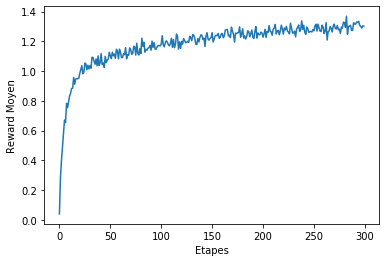

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

class Bandit:
    def __init__(self, k):
        self.k = k
        self.qstar = np.random.normal(size=k)
    
    def action(self, a):
        return np.random.normal(loc=self.qstar[a])

## k le nombre de bandits
## nimsteps le nombre d'action de selection 
## Apossible la liste des actions possible au moment d'une action 
## A les actions selectionnée au moment d'une action 
# N[a,t]: le nombre d'action a selectionné au moment de l'action 0  
# R[t]: reward au moment d'une action
# Q[a,t]: la valeur estimé de a au moment d'une action
        
def action_greedy(k, netape, epsilon):
    Apossible = {}
    A = np.zeros((netape,))
    N = np.zeros((k,netape+1))
    R = np.zeros((netape,))
    Q = np.zeros((k,(netape+1)))
    bandit = Bandit(k)   # Initialisation du  bandit
    
    for t in range(netape):
        if np.random.rand() < epsilon:
            # toutes les possibilités des actions sont égales
            Apossible[t] = np.arange(k)
        else:
            # Sélectionner les actions greedy comme actions possibles
            Apossible[t] = np.argwhere(Q[:,t] == np.amax(Q[:,t])).flatten()

        # Sélectionner une action au hasard parmi les actions possibles
        a = Apossible[t][np.random.randint(len(Apossible[t]))]

        # Enregistrer l'action prise
        A[t] = a

         # Effectuer une action
        R[t] = bandit.action(a)

        # mise à jour du comptage d'action 
        N[:,t+1] = N[:,t]
        N[a,t+1] += 1

        # Mettre à jour les estimations de la valeur d'action, progressivement
        if N[a,t] > 0:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = Q[a,t] + (R[t] - Q[a,t]) / N[a,t]
        else:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = R[t]

    return {'bandit' : bandit,
            'numsteps' : netape,
            'epsilon' : epsilon,
            'Apossible': Apossible, 
            'A': A, 'N' : N, 'R' : R, 'Q' : Q}

k=10   
numetape = 300
numaction = 2000
epsilon = 0.1

moyenR = np.zeros((numetape, ))
for task in range(2000):
    bandit_task = action_greedy(k,numetape, epsilon)
    moyenR += bandit_task['R']
moyenR /= numaction

plt.plot(moyenR) ;
plt.ylabel('Reward Moyen') ;
plt.xlabel('Etapes') ;
plt.show()


# TP2-Ronforcement Learning

In [42]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random

Populating the interactive namespace from numpy and matplotlib


## 1- Policy evaluation 

In [58]:
gamma=1
r=-1
taille=4
k0=np.zeros((4, 4))
k=10
actions=[[-1,0],[1,0],[0,1],[0,-1]]
etat_initial_final=[[0,0], [taille-1, taille-1]]

In [59]:
def Reaward(position_initaile, action):
    
    if position_initaile in etat_initial_final:
        return position_initaile, 0
    
    reward = r
    position_final = np.array(position_initaile) + np.array(action)
    if -1 in position_final or 4 in position_final: 
        position_final = position_initaile
        
    return position_final, reward

In [60]:
etats = [[i, j] for i in range(taille) for j in range(taille)]

In [61]:
deltas = []
for i in range(k):
    copie_k0 = np.copy(k0)
    etat_delta = []
    for etat in etats:
        poid_reward = 0
        for action in actions:
            position_final, reward = Reaward(etat, action)
            poid_reward += (1/len(actions))*(reward+(gamma*k0[position_final[0], position_final[1]]))
        etat_delta.append(np.abs(copie_k0[etat[0], etat[1]]-poid_reward))
        copie_k0[etat[0], etat[1]] = poid_reward
    deltas.append(etat_delta)
    k0 = copie_k0
    if i in [0,1,2,3,4,5,6,7,8,9, k-1]:
        print("K = {}".format(i+1))
        print(k0)
        print("")

K = 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

K = 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]

K = 3
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]

K = 4
[[ 0.      -3.0625  -3.84375 -3.96875]
 [-3.0625  -3.71875 -3.90625 -3.84375]
 [-3.84375 -3.90625 -3.71875 -3.0625 ]
 [-3.96875 -3.84375 -3.0625   0.     ]]

K = 5
[[ 0.        -3.65625   -4.6953125 -4.90625  ]
 [-3.65625   -4.484375  -4.78125   -4.6953125]
 [-4.6953125 -4.78125   -4.484375  -3.65625  ]
 [-4.90625   -4.6953125 -3.65625    0.       ]]

K = 6
[[ 0.         -4.20898438 -5.50976562 -5.80078125]
 [-4.20898438 -5.21875    -5.58984375 -5.50976562]
 [-5.50976562 -5.58984375 -5.21875    -4.20898438]
 [-5.80078125 -5.50976562 -4.20898438  0.        ]]

K = 7
[[ 0.         -4.734375   -6.27734375 -6.65527344]
 [-4.734375   -5.899414

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

## 2- Policy improuvement

In [ ]:
import numpy as np
import pprint
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv


pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()


# Taken from Policy Evaluation !

def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, action_prob in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for  prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        # Stop evaluating once our value function change is below a threshold
        if delta < theta:
            break
    return np.array(V)


def policy_improvement(env, policy_eval_fn=policy_eval, discount_factor=1.0):
    """
    Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI environment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """

    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
    
    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    while True:
        # Evaluate the current policy
        V = policy_eval_fn(policy, env, discount_factor)
        
        # Will be set to false if we make any changes to the policy
        policy_stable = True
        
        # For each state...
        for s in range(env.nS):
            # The best action we would take under the current policy
            chosen_a = np.argmax(policy[s])
            
            # Find the best action by one-step lookahead
            # Ties are resolved arbitarily
            action_values = one_step_lookahead(s, V)
            best_a = np.argmax(action_values)
            
            # Greedily update the policy
            if chosen_a != best_a:
                policy_stable = False
            policy[s] = np.eye(env.nA)[best_a]
        
        # If the policy is stable we've found an optimal policy. Return it
        if policy_stable:
            return policy, V
        
        
        
policy, v = policy_improvement(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

# Test the value function
expected_v = np.array([ 0, -1, -2, -3, -1, -2, -3, -2, -2, -3, -2, -1, -3, -2, -1,  0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

## 3- Value Iteration

In [ ]:
import numpy as np
import pprint
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()

def value_iteration(env, theta=0.0001, discount_factor=1.0):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.
    """
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
    
    V = np.zeros(env.nS)
    while True:
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(env.nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value        
        # Check if we can stop 
        if delta < theta:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0
    
    return policy, V

policy, v = value_iteration(env)

print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

# Test the value function
expected_v = np.array([ 0, -1, -2, -3, -1, -2, -3, -2, -2, -3, -2, -1, -3, -2, -1,  0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

# TP3-Ronforcement Learning (Monte-Carlo)

In [ ]:
import sys
import gym
import numpy as np
from collections import defaultdict
from plot_utils import plot_blackjack_values, plot_policy

In [ ]:
env = gym.make('Blackjack-v0')

In [ ]:
def play_episode(env):
    """
    Plays a single episode with a set policy in the environment given. Records the state, action 
    and reward for each step and returns the all timesteps for the episode.
    """
    episode = []
    state = env.reset()
    while True:
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [ ]:
def update_Q(episode, Q,returns_sum, N, gamma=1.0):
    """
    For each time step in the episode we carry out the first visit monte carlo method, checking if this is 
    the first index of this state. Get the discounted reward and add it to the total reward for that 
    state/action pair. Increment the times we have seen this state action pair and finally update the Q values
    """
    
    for s, a, r in episode:
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == s)
            G = sum([x[2]*(gamma**i) for i,x in enumerate(episode[first_occurence_idx:])])
            returns_sum[s][a] += G
            N[s][a] += 1.0
            Q[s][a] = returns_sum[s][a] / N[s][a]

In [ ]:
def mc_predict(env, num_episodes, gamma=1.0):

    """
    This is the primary method. Plays through several episodes of the environment. 
    """
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        episode = play_episode(env)

        update_Q(episode, Q, returns_sum, N)
            
    return Q

In [ ]:
Q = mc_predict(env, 500000)

#get the state value function for our test policy
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state value functions
plot_blackjack_values(V_to_plot)